In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as scs
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from prepare import prep_iris

In [95]:
iris = prep_iris()
iris = iris.iloc[:,:5] #extra columns for ML
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [96]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


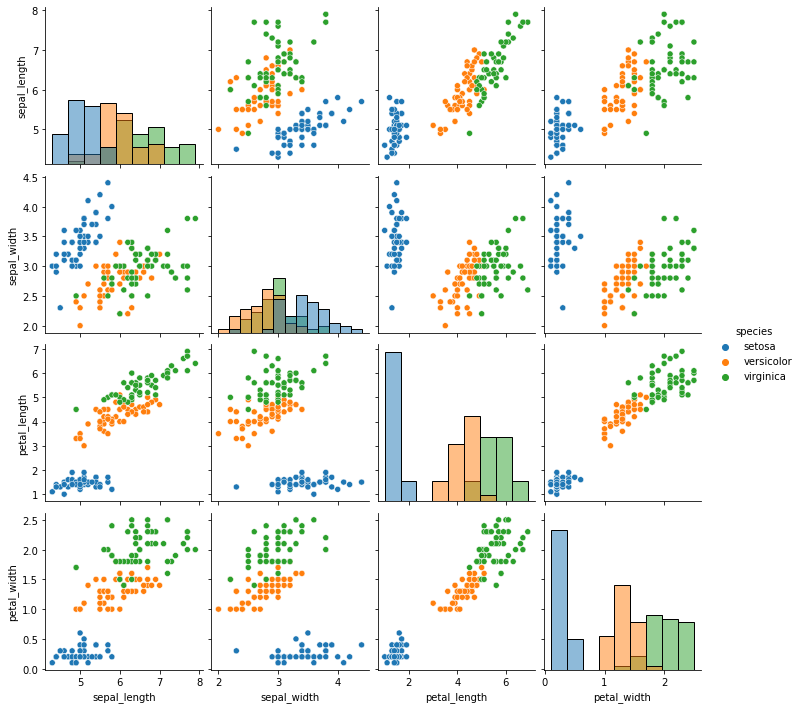

In [97]:
sns.pairplot(iris, hue='species', diag_kind='hist');

In [101]:
measurements = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

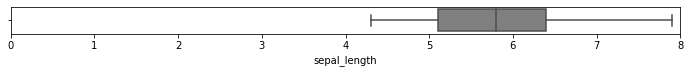

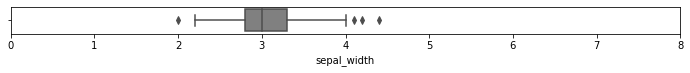

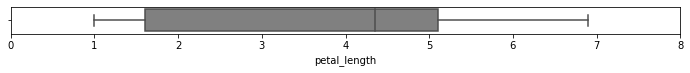

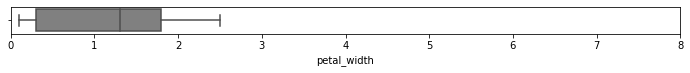

In [8]:
for x in measurements:
    f = plt.subplots(figsize=(12, .5))
    sns.boxplot(x=iris[x], color='gray')
    plt.xlim(0,8)
    plt.show()

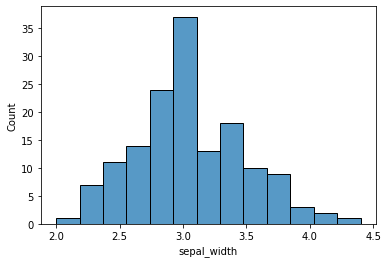

In [9]:
#the distribution looks symmetrical here
sns.histplot(iris.sepal_width);

Versicolor and virginica comparisons: all measurements are significantly different.

In [19]:
for x in measurements:
    m1 = iris[x][iris.species == 'versicolor']
    m2 = iris[x][iris.species == 'virginica']
    print(x, round(np.mean(m1),2), round(np.mean(m2),2))
    t, p = scs.mannwhitneyu(m1, m2)
    print(f"   p-value: {p}")

sepal_length 5.94 6.59
   p-value: 2.9345032053320985e-07
sepal_width 2.77 2.97
   p-value: 0.0022860711034399265
petal_length 4.26 5.55
   p-value: 4.566772363834128e-17
petal_width 1.33 2.03
   p-value: 4.8490227224570924e-17


In [98]:
melted = pd.melt(iris, id_vars=['species'], var_name='part', value_name='measure')
melted.head()

,species,part,measure
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


Is the sepal area signficantly different in virginica compared to setosa? Petals are clearly different but sepals are overlapping.

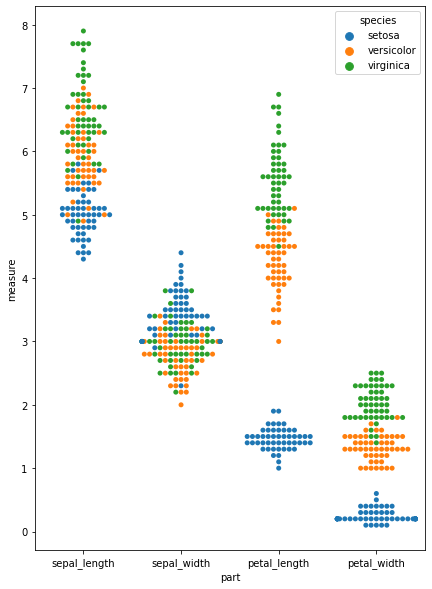

In [104]:
f = plt.subplots(figsize=(7,10))
sns.swarmplot(data=melted, x='part', y='measure', hue='species');

In [106]:
for x1, x2 in [['sepal_length', 'sepal_width'], ['petal_length', 'petal_width']]:
    m1 = iris[x1][iris.species == 'setosa']*iris[x2][iris.species == 'setosa']
    m2 = iris[x1][iris.species == 'virginica']*iris[x2][iris.species == 'virginica']
    print(x, round(np.mean(m1),2), round(np.mean(m2),2))
    t, p = scs.mannwhitneyu(m1, m2)
    print(f"   p-value: {p}")

petal_width 17.26 19.68
   p-value: 0.00010979050806892544
petal_width 0.37 11.3
   p-value: 3.3861998420778566e-18


Mann-Whitney says the difference is significant. Mean sepal area setosa = 17.2, mean sepal area virginica = 19.7 and that is a difference that counts in these distributions. (As expected, petal area are vastly different.)